In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
stock =  pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/master/dataset/Tesla%20Stock%20Price/Tesla.csv%20-%20Tesla.csv.csv')
stock.head()
stock.set_index('Date', inplace=True)
stock

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [3]:
stock.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Open'>

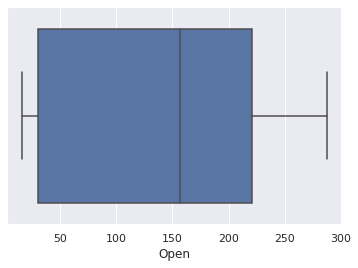

In [4]:
sns.boxplot(stock['Open'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Close'>

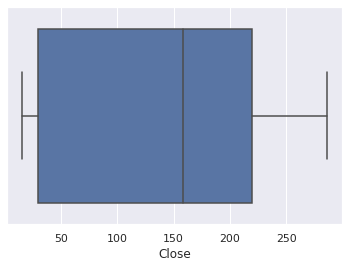

In [5]:
sns.boxplot(stock['Close'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Low'>

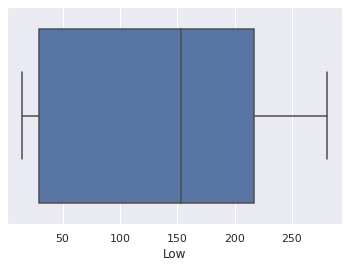

In [6]:
sns.boxplot(stock['Low'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='High'>

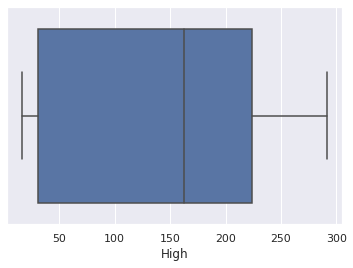

In [7]:
sns.boxplot(stock['High'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Volume'>

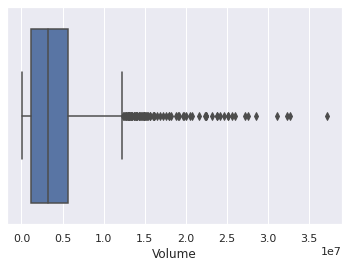

In [8]:
sns.boxplot(stock['Volume'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Open'>

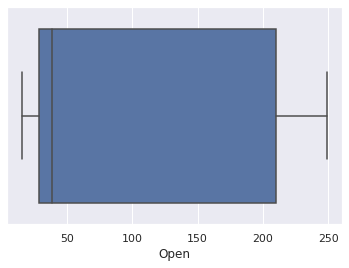

In [9]:
r = stock['Volume'].quantile(0.90)
stock_1 = stock[stock['Volume'] < r]
r = stock_1['Open'].quantile(0.90)
stock_2 = stock_1[stock_1['Open'] < r]
sns.boxplot(stock_2['Open'])

In [10]:
r = stock_2['Close'].quantile(0.90)
stock_3 = stock_2[stock_2['Close'] < r]
r = stock_3['High'].quantile(0.90)
stock_4 = stock_3[stock_3['High'] < r]
r = stock_4['Low'].quantile(0.90)
stock_5 = stock_4[stock_4['Low'] < r]
data_no_outliers = stock_5.reset_index(drop=True)
data_no_outliers.describe()

,Open,High,Low,Close,Volume,Adj Close
count,997.000000,997.000000,997.000000,997.000000,9.970000e+02,997.000000
mean,72.155366,73.484343,70.729308,72.164102,2.538884e+06,72.164102
std,69.990604,71.148049,68.761193,70.057977,2.297192e+06,70.057977
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,27.400000,27.940001,26.709999,27.340000,8.549000e+05,27.340000
50%,31.959999,32.490002,31.200001,31.930000,1.402700e+06,31.930000
75%,141.880005,144.350006,140.970001,142.000000,3.870100e+06,142.000000
max,216.820007,217.500000,203.850006,211.710007,9.061500e+06,211.710007


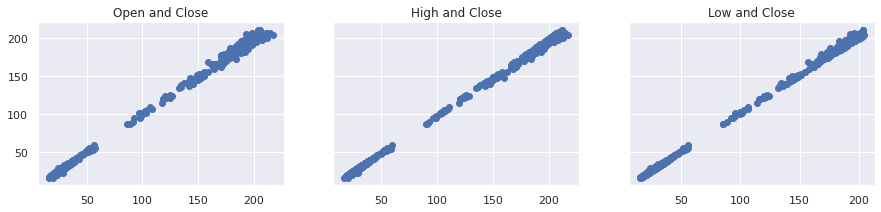

In [11]:
g, (x1,x3,x4) = plt.subplots(1,3, sharey=True, figsize=(15,3))
x1.scatter(data_no_outliers['Open'],data_no_outliers['Close'])
x1.set_title('Open and Close')
x3.scatter(data_no_outliers['High'],data_no_outliers['Close'])
x3.set_title('High and Close')
x4.scatter(data_no_outliers['Low'],data_no_outliers['Close'])
x4.set_title('Low and Close')

plt.show()

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = data_no_outliers[['Open','High','Low']]
VIF = pd.DataFrame()
VIF['vif'] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]
VIF['features'] = variable.columns.values
VIF

,vif,features
0,6098.349096,Open
1,6164.765024,High
2,5095.915247,Low


In [13]:
data_cleaned = data_no_outliers
data_cleaned

,Open,High,Low,Close,Volume,Adj Close
0,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
1,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
3,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
4,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
...,...,...,...,...,...,...
992,198.740005,203.000000,196.759995,198.690002,4150900,198.690002
993,198.410004,200.740005,197.389999,197.580002,3219600,197.580002
994,198.080002,202.589996,197.600006,202.490005,3796900,202.490005
995,202.490005,204.449997,199.839996,202.729996,3488100,202.729996


In [14]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
scaled.fit(data_cleaned)
scaled_data = scaled.transform(data_cleaned)
scaled_data = pd.DataFrame(scaled_data,columns=data_cleaned.columns.values)
scaled_data

,Open,High,Low,Close,Volume,Adj Close
0,-0.674077,-0.668862,-0.734202,-0.716968,2.473789,-0.716968
1,-0.702666,-0.708517,-0.756901,-0.756383,1.132784,-0.756383
2,-0.745551,-0.752110,-0.798806,-0.800512,1.884992,-0.800512
3,-0.797012,-0.799500,-0.811174,-0.804939,1.908859,-0.804939
4,-0.800729,-0.786985,-0.802589,-0.781232,2.252799,-0.781232
...,...,...,...,...,...,...
992,1.809502,1.821282,1.833795,1.806923,0.702085,1.806923
993,1.804785,1.789501,1.842962,1.791071,0.296474,1.791071
994,1.800068,1.815516,1.846018,1.861191,0.547907,1.861191
995,1.863108,1.841672,1.878610,1.864619,0.413414,1.864619


In [15]:
from sklearn.model_selection import train_test_split
x = scaled_data[['Open','High','Low','Volume']]
y = scaled_data['Close']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2,random_state=23)
x_train.shape , y_train.shape

((797, 4), (797,))

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [17]:
reg.coef_

array([-0.64423193,  1.03481372,  0.61179904, -0.00328489])

In [18]:
reg.intercept_

0.0001289681464574314

In [19]:
train_predict = reg.predict(x_train)
train_predict

array([-0.60515172, -0.72965429, -0.54885741, -0.54225122,  1.06175676,
       -0.47774421,  1.6584523 ,  1.097128  , -0.69318797, -0.58214203,
       -0.55436813, -0.69109615, -0.69117212, -0.65014461, -0.70355702,
       -0.69042943, -0.58038884, -0.73909449,  1.66417271, -0.81629005,
       -0.66917141, -0.56523667, -0.58547938, -0.74653171, -0.64032409,
       -0.72110713, -0.75124201,  1.74421483, -0.70597903, -0.49163912,
       -0.68195734,  1.66728304,  1.69199404, -0.55623667, -0.53543044,
        0.43029231, -0.60881902,  1.73268348, -0.62724995,  0.71802176,
        1.89067713, -0.48865809, -0.59571184, -0.55736184,  1.82906773,
       -0.6230081 , -0.71578845, -0.5792635 ,  1.02451138, -0.63000164,
       -0.6081972 , -0.73387662, -0.68322262, -0.55863843,  1.30568521,
       -0.66185255, -0.74716688, -0.63411133, -0.46556701, -0.32833852,
       -0.568683  , -0.62666275, -0.53368925, -0.73697788,  1.86789853,
       -0.61132799, -0.65146901, -0.5808056 , -0.48790855, -0.62

In [20]:
predict_train_table = pd.DataFrame({
    'Actual':y_train,'prediction': train_predict})
predict_train_table=predict_train_table.reset_index(drop=True)
predict_train_table.head(20)

,Actual,prediction
0,-0.600149,-0.605152
1,-0.729963,-0.729654
2,-0.543881,-0.548857
3,-0.545881,-0.542251
4,1.068736,1.061757
5,-0.480188,-0.477744
6,1.655259,1.658452
7,1.076305,1.097128
8,-0.686406,-0.693188
9,-0.575871,-0.582142


<AxesSubplot:>

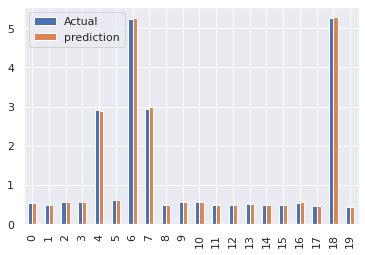

In [21]:
show_graph_train = np.exp(predict_train_table.head(20))
show_graph_train.plot(kind='bar')

In [22]:
predict_test = reg.predict(x_test)
predict_test_table = pd.DataFrame({'Actual': y_test,'Prediction': predict_test
})
predict_test_table =predict_test_table.reset_index(drop=True)
predict_test_table.head(25)

,Actual,Prediction
0,1.877043,1.912844
1,1.500166,1.529032
2,-0.638565,-0.640574
3,1.807066,1.756114
4,-0.245978,-0.256596
5,-0.625426,-0.625354
6,-0.542453,-0.550536
7,-0.677409,-0.680598
8,-0.654845,-0.647214
9,-0.662842,-0.663703


In [23]:
from sklearn.metrics import mean_absolute_error 
mean_absolute_error(y_test,predict_test)

0.009796321429785154

In [24]:
print('Mean_abolute_error is' , str(mean_absolute_error(y_test,predict_test)),sep="    ")

Mean_abolute_error is    0.009796321429785154


In [25]:
from sklearn import metrics
import math
metrics.mean_absolute_error(y_test,predict_test)

0.009796321429785154

In [26]:
metrics.mean_squared_error(y_test,predict_test)

0.0003190722526169304

In [27]:
math.sqrt(metrics.mean_squared_error(y_test,predict_test))

0.0178625936699274

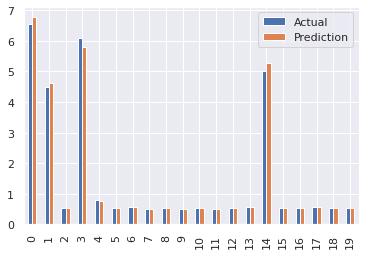

In [28]:
show_graph = np.exp(predict_test_table.head(20))
show_graph.plot(kind='bar')
plt.show()